# Bike Rental Prediction

## Project Member's Name : 
  #####  1. Logeshwary Selvaraj 
  #####  2. Kishore Kumar S 
  #####  3. Bharath K 
  #####  4. Nawaz Hussain Z 

# 1. Importing Libraries :

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings 
warnings.filterwarnings('ignore')

# 2. Importing And Understanding Our Dataset :

In [4]:
df_hour = pd.read_csv('hour.csv')
df_hour.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [5]:
df_hour.shape

(17379, 17)

In [7]:
df_hour.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [9]:
df_hour.nunique()

instant       17379
dteday          731
season            4
yr                2
mnth             12
hr               24
holiday           2
weekday           7
workingday        2
weathersit        4
temp             50
atemp            65
hum              89
windspeed        30
casual          322
registered      776
cnt             869
dtype: int64

### Finding out duplicates :¶

In [16]:
df_hour.loc[df_hour.duplicated()]

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt


### Renaming the features to a proper name for better understanding :

In [17]:
df = df_hour.rename(columns = {'weathersit':'weather',
                              'yr':'year',
                              'mnth':'month',
                              'hr':'hour',
                              'hum':'humidity',
                              'cnt':'count' }) 
df.head(5)

,instant,dteday,season,year,month,hour,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [18]:
df = df.drop(columns=['instant','dteday','year'])

In [19]:
df.head(5)

,season,month,hour,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,1,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,1,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,1,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,1,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,1,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


# 3. Exploratory Data Analysis (EDA) 

### ~ Count of bikes during weekdays and weekends:

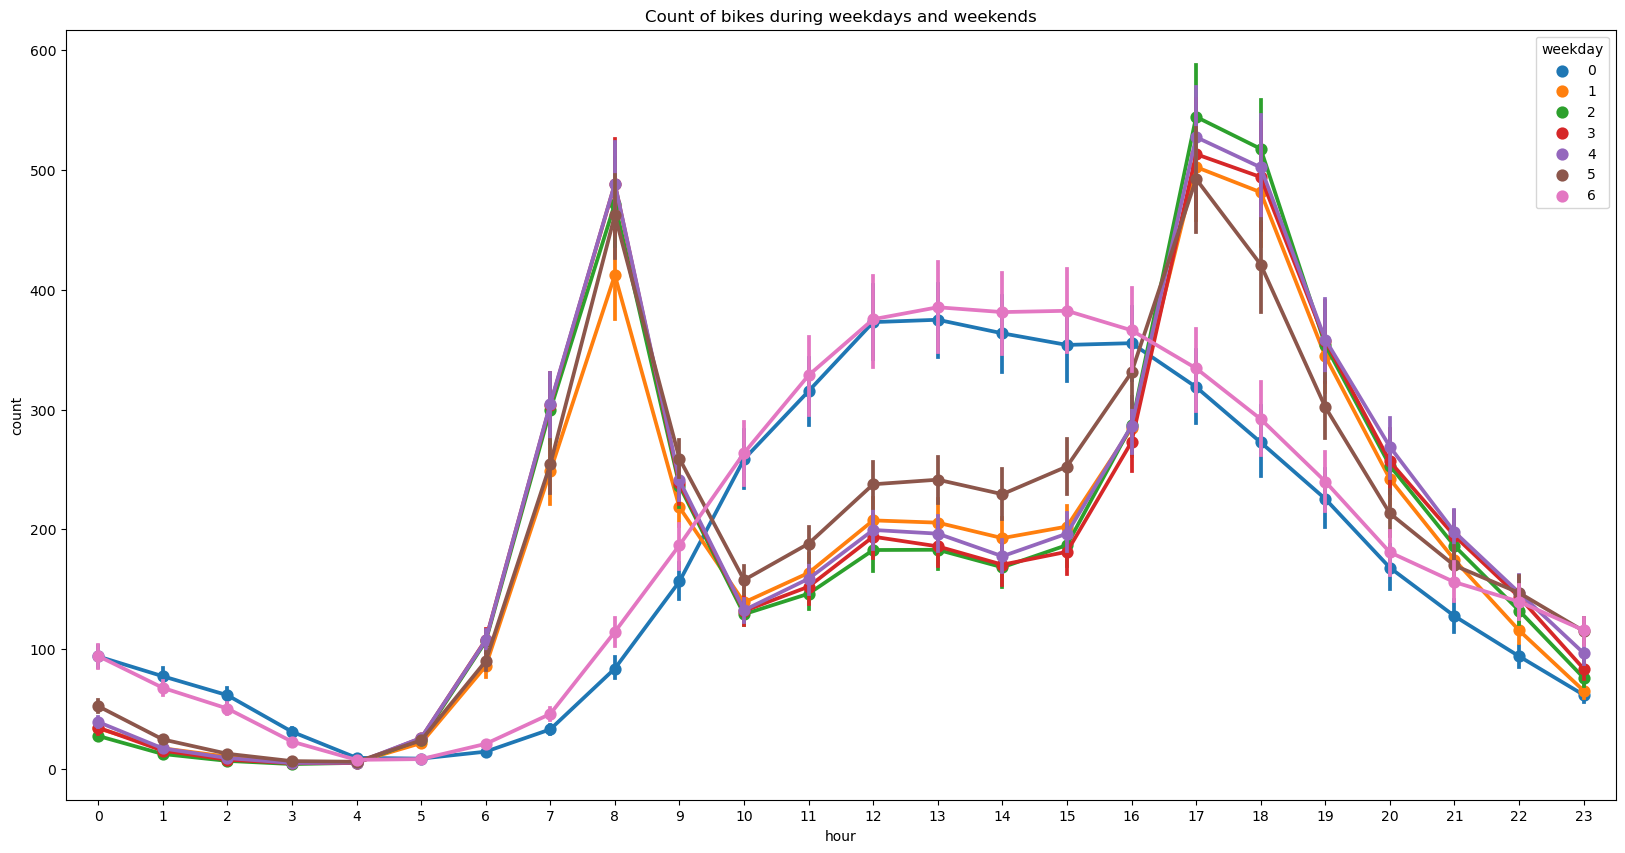

In [20]:
fig, ax = plt.subplots(figsize=(20,10))
sns.pointplot(data=df, x='hour', y='count', hue='weekday', ax=ax)
ax.set(title='Count of bikes during weekdays and weekends')
plt.show()

### ~ Count of bikes during weekdays and weekends (Unregistered users) :

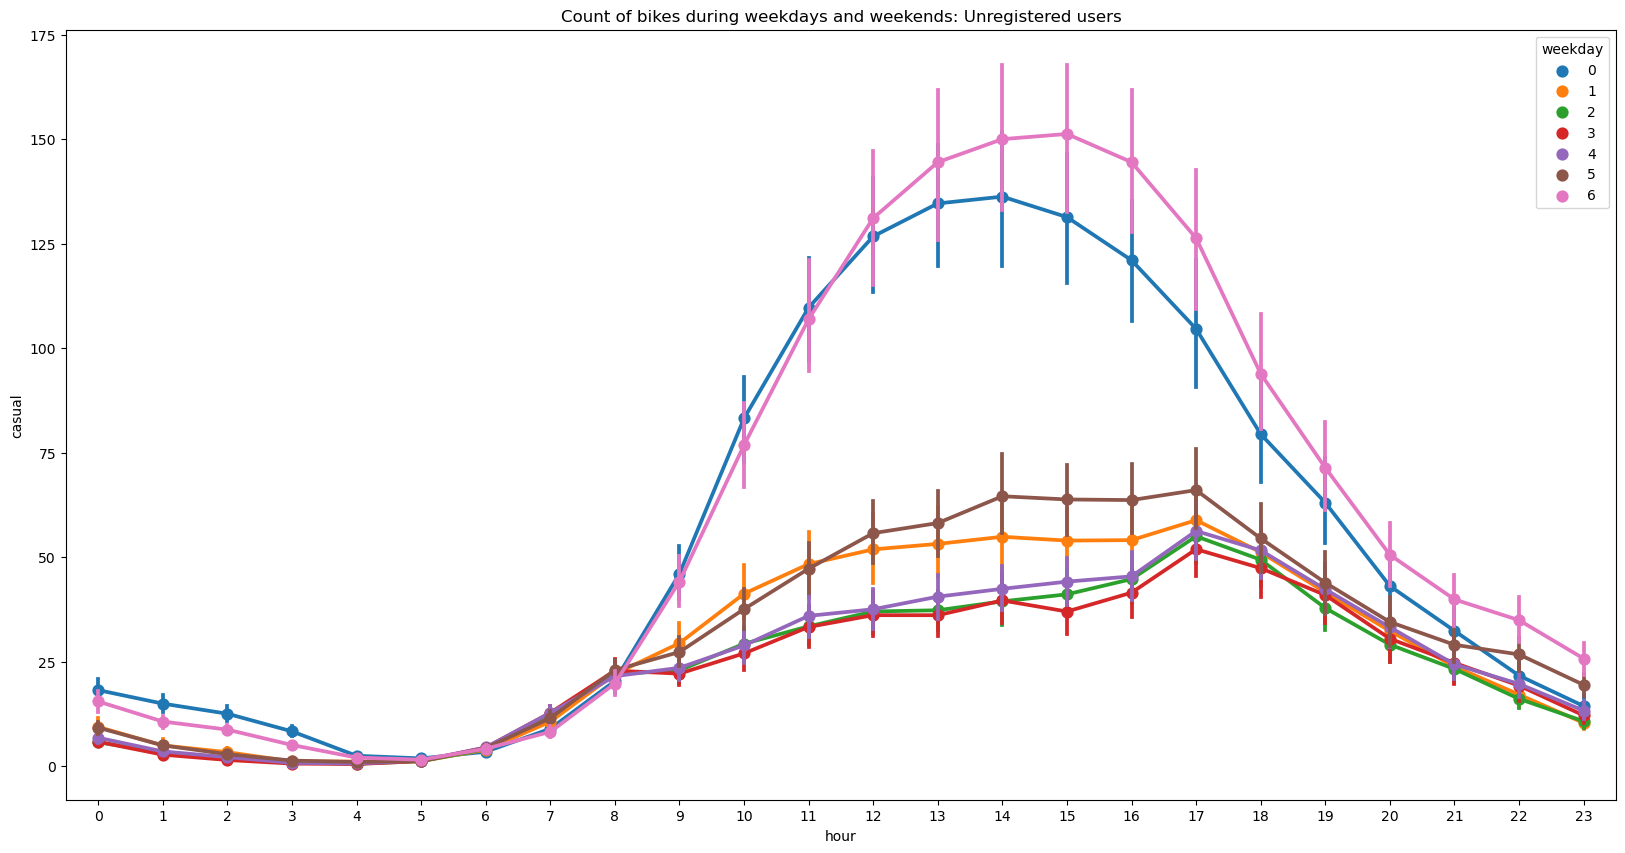

In [21]:
fig, ax = plt.subplots(figsize=(20,10))
sns.pointplot(data=df, x='hour', y='casual', hue='weekday', ax=ax)
ax.set(title='Count of bikes during weekdays and weekends: Unregistered users')
plt.show()

### ~ Count of bikes during weekdays and weekends (Registered users) :

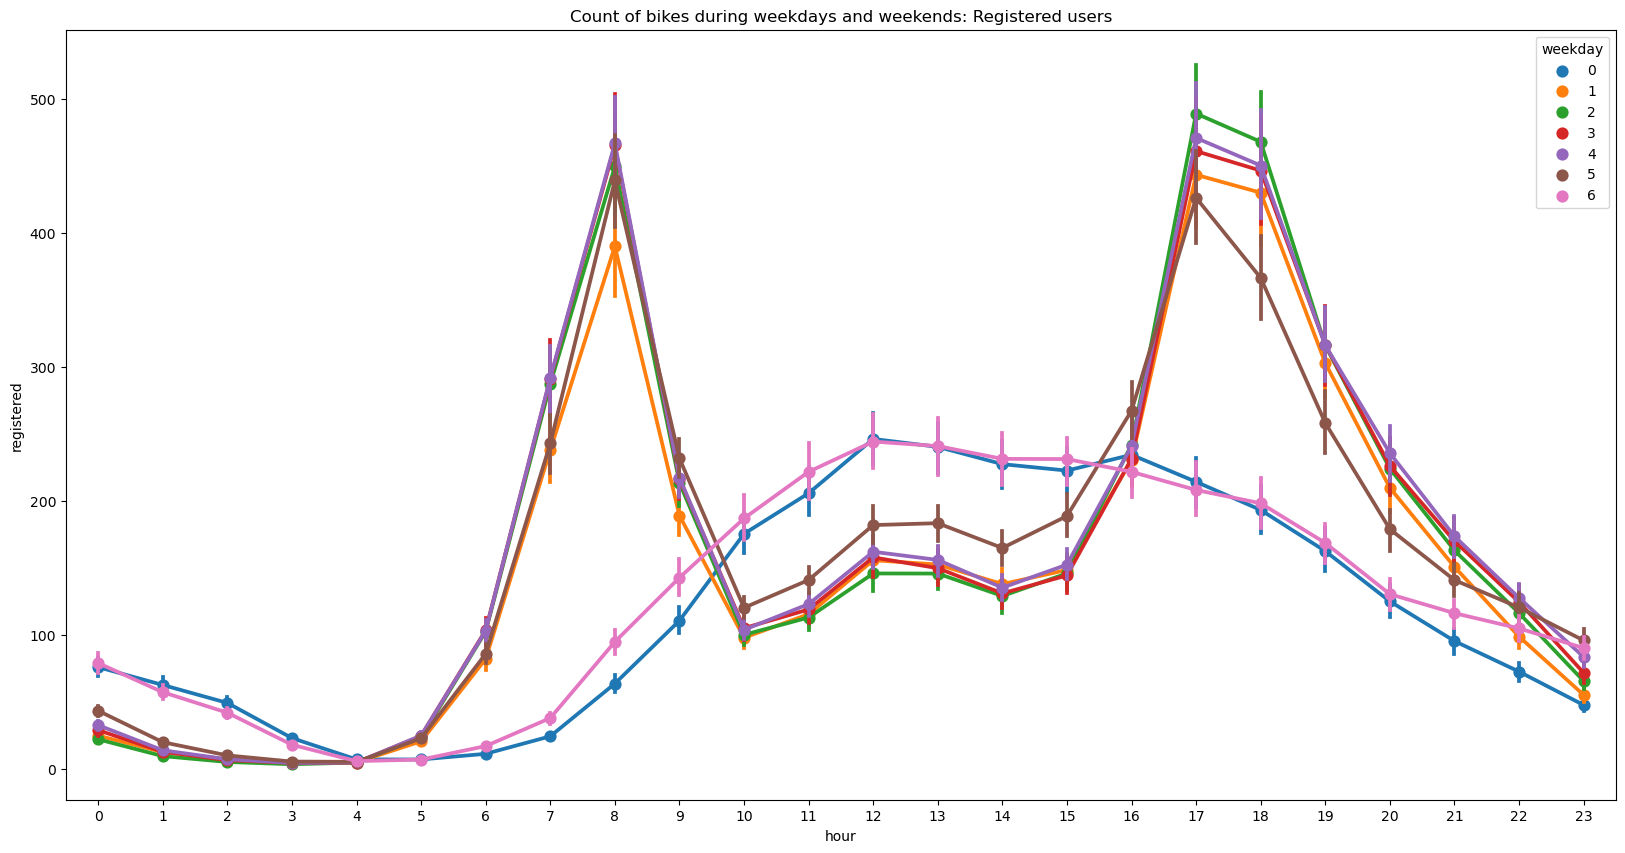

In [22]:
fig, ax = plt.subplots(figsize=(20,10))
sns.pointplot(data=df, x='hour', y='registered', hue='weekday', ax=ax)
ax.set(title='Count of bikes during weekdays and weekends: Registered users')
plt.show()

### ~ Count of bikes during different weathers :

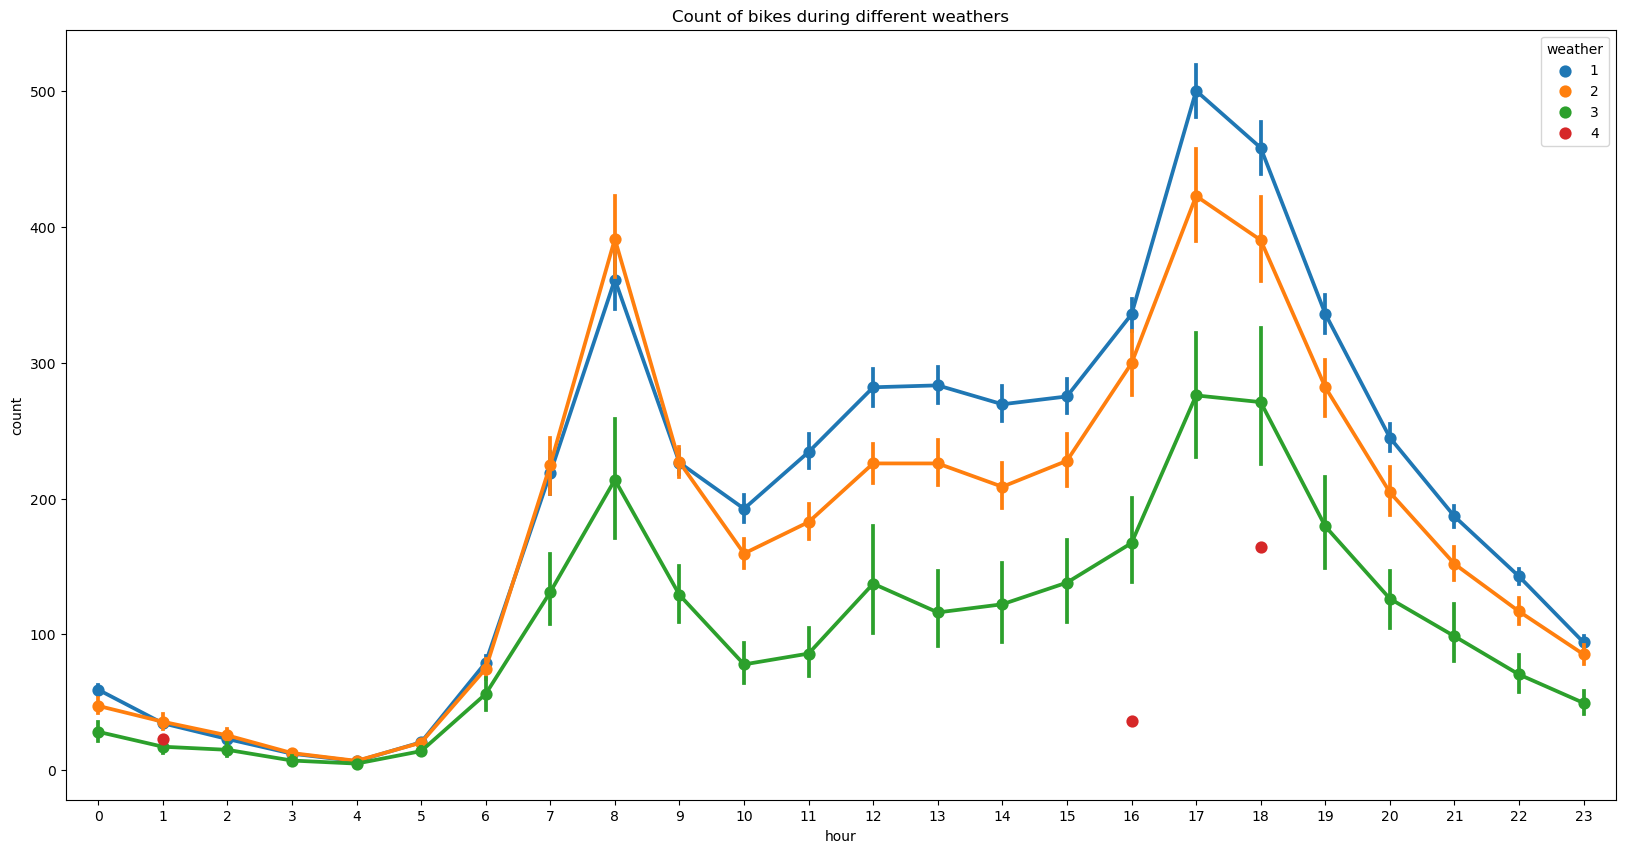

In [23]:
fig, ax = plt.subplots(figsize=(20,10))
sns.pointplot(data=df, x='hour', y='count', hue='weather', ax=ax)
ax.set(title='Count of bikes during different weathers')
plt.show()

### ~ Count of bikes during different seasons :

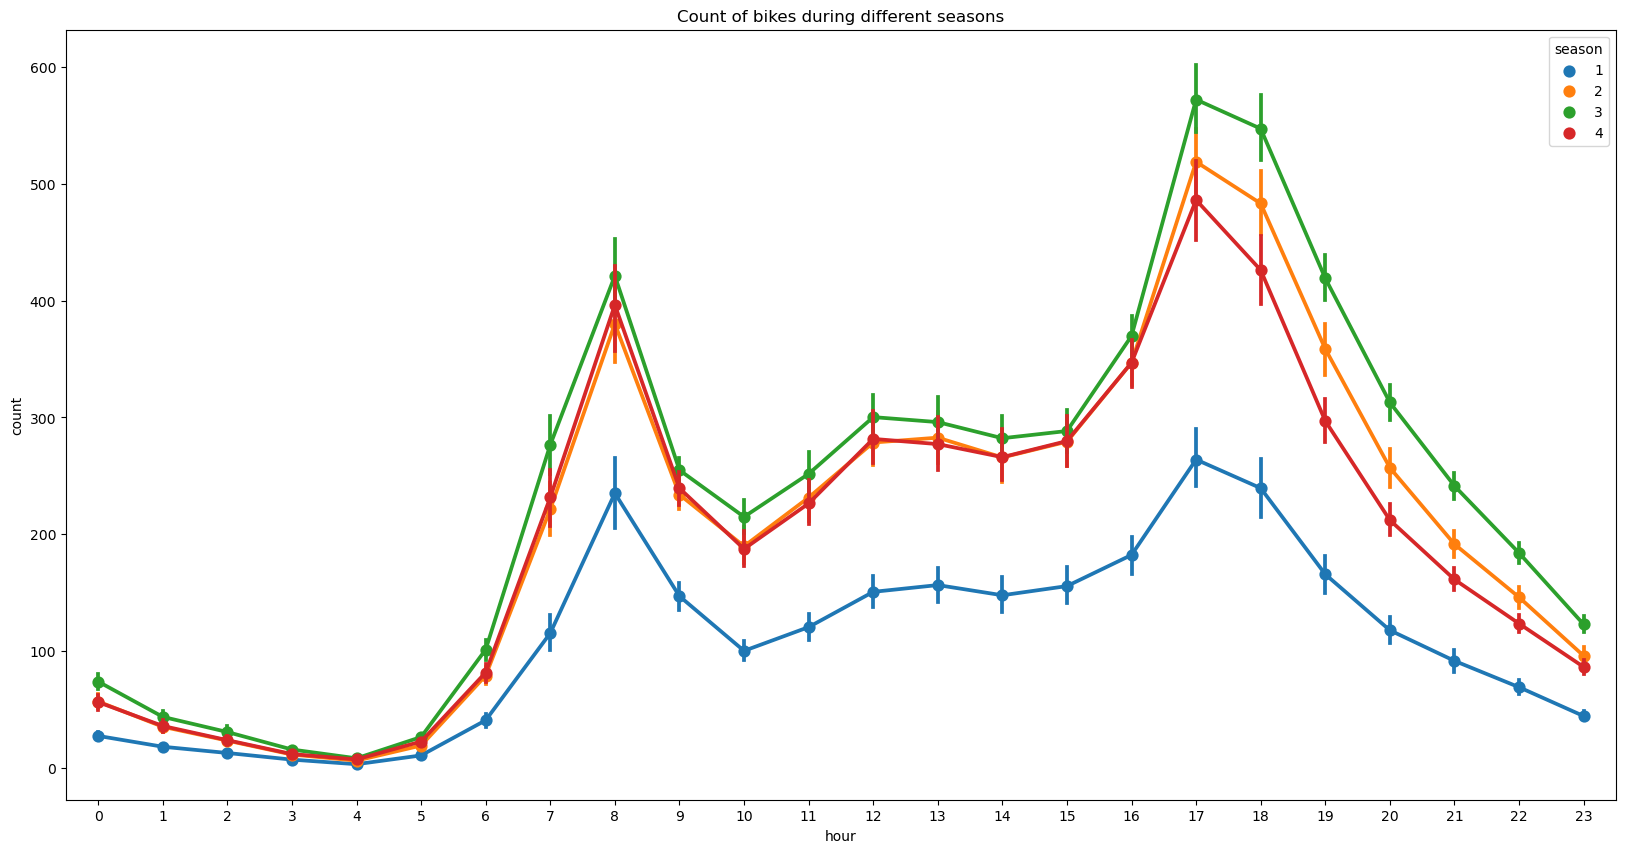

In [24]:
fig, ax = plt.subplots(figsize=(20,10))
sns.pointplot(data=df, x='hour', y='count', hue='season', ax=ax)
ax.set(title='Count of bikes during different seasons')
plt.show()

### ~ Count of bikes during different months :

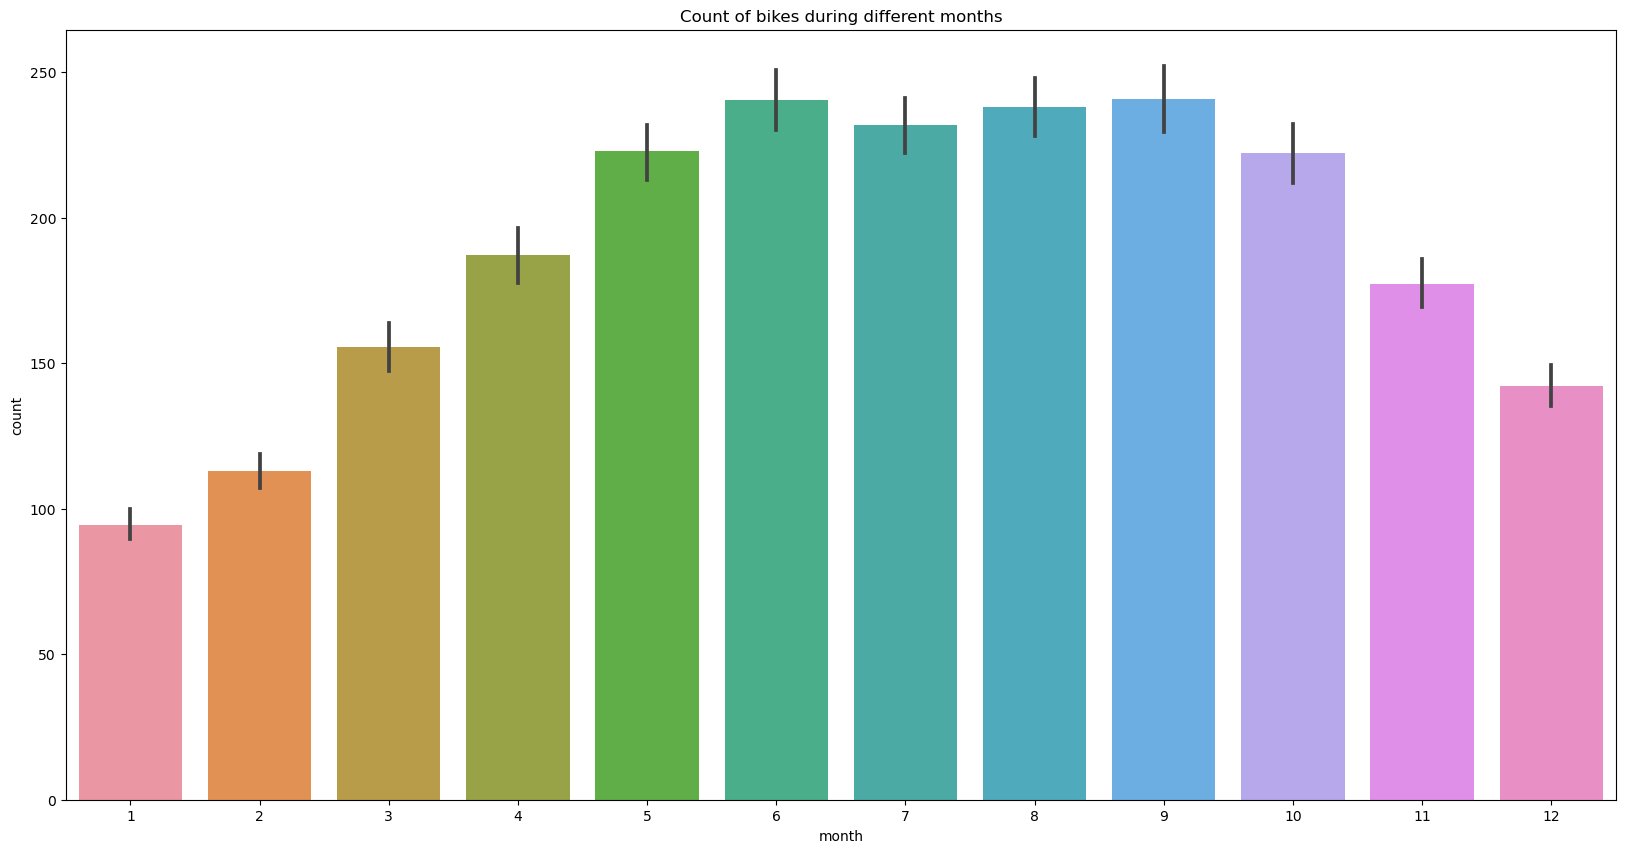

In [25]:
fig, ax = plt.subplots(figsize=(20,10))
sns.barplot(data=df, x='month', y='count', ax=ax)
ax.set(title='Count of bikes during different months')
plt.show()

### ~ Count of bikes during different days :

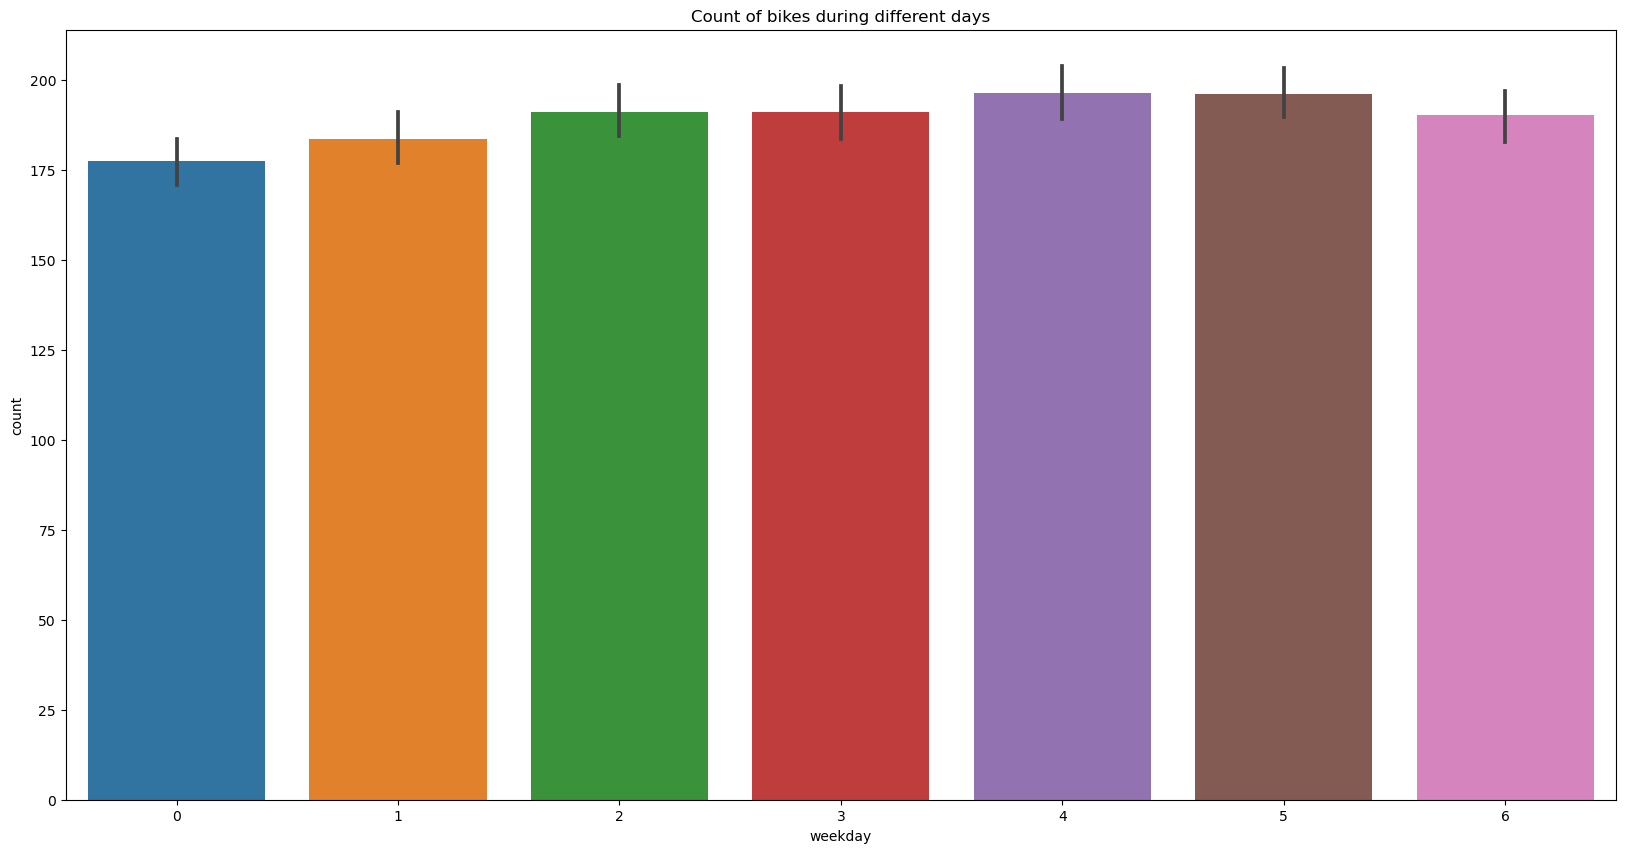

In [26]:
fig, ax = plt.subplots(figsize=(20,10))
sns.barplot(data=df, x='weekday', y='count', ax=ax)
ax.set(title='Count of bikes during different days')
plt.show()

### ~ Relation between temperature and users :

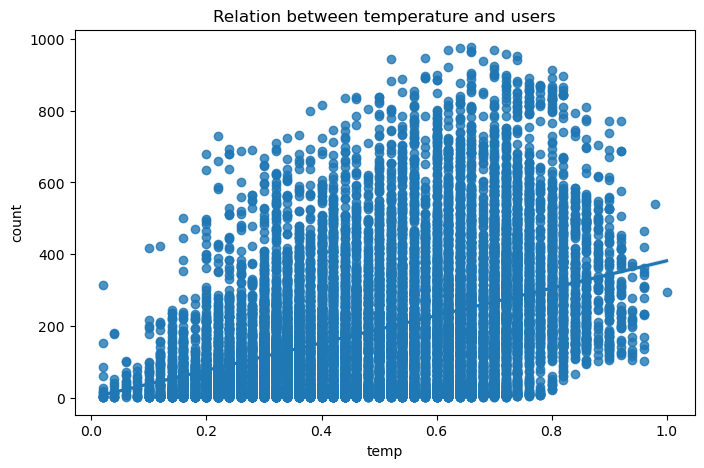

In [27]:
fig, ax = plt.subplots(figsize=(8,5))
sns.regplot(x=df['temp'], y=df['count'],ax=ax)
ax.set(title="Relation between temperature and users")
plt.show()

### ~ Relation between humidity and users :

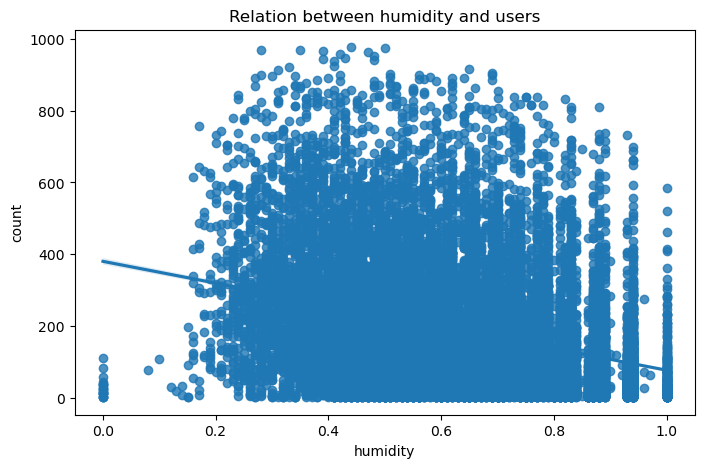

In [28]:
fig, ax = plt.subplots(figsize=(8,5))
sns.regplot(x=df['humidity'], y=df['count'], ax=ax )
ax.set(title="Relation between humidity and users")
plt.show()

## Coorelation Matrix :

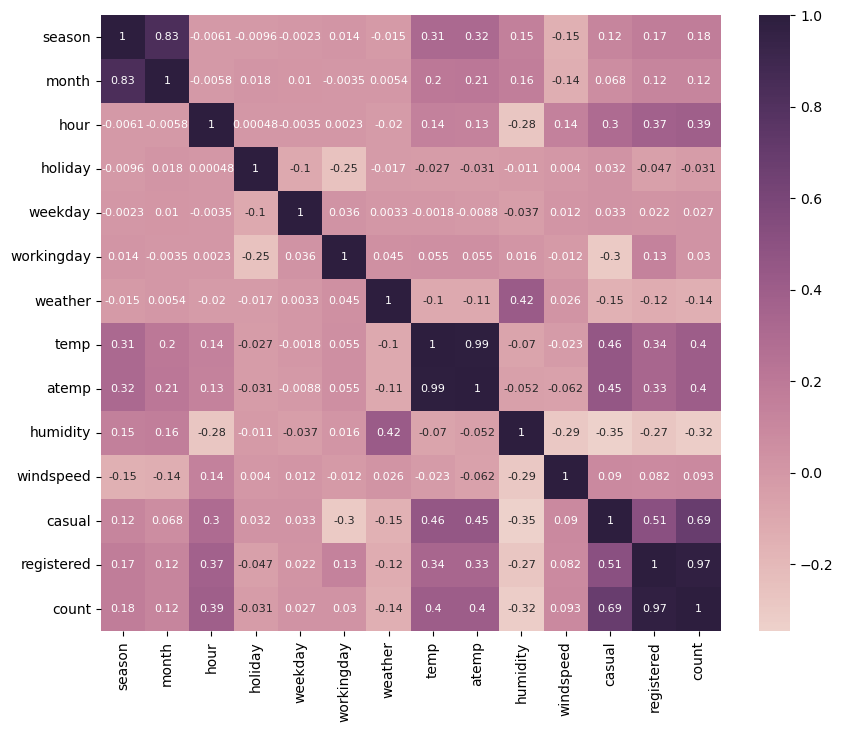

In [29]:
corr = df.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr,cmap=sns.cubehelix_palette(as_cmap=True), annot=True, annot_kws={'size':8})
plt.show()

In [30]:
sns.pairplot(df, hue = 'count', vars = ['temp', 'atemp','humidity','windspeed','registered','casual'] )

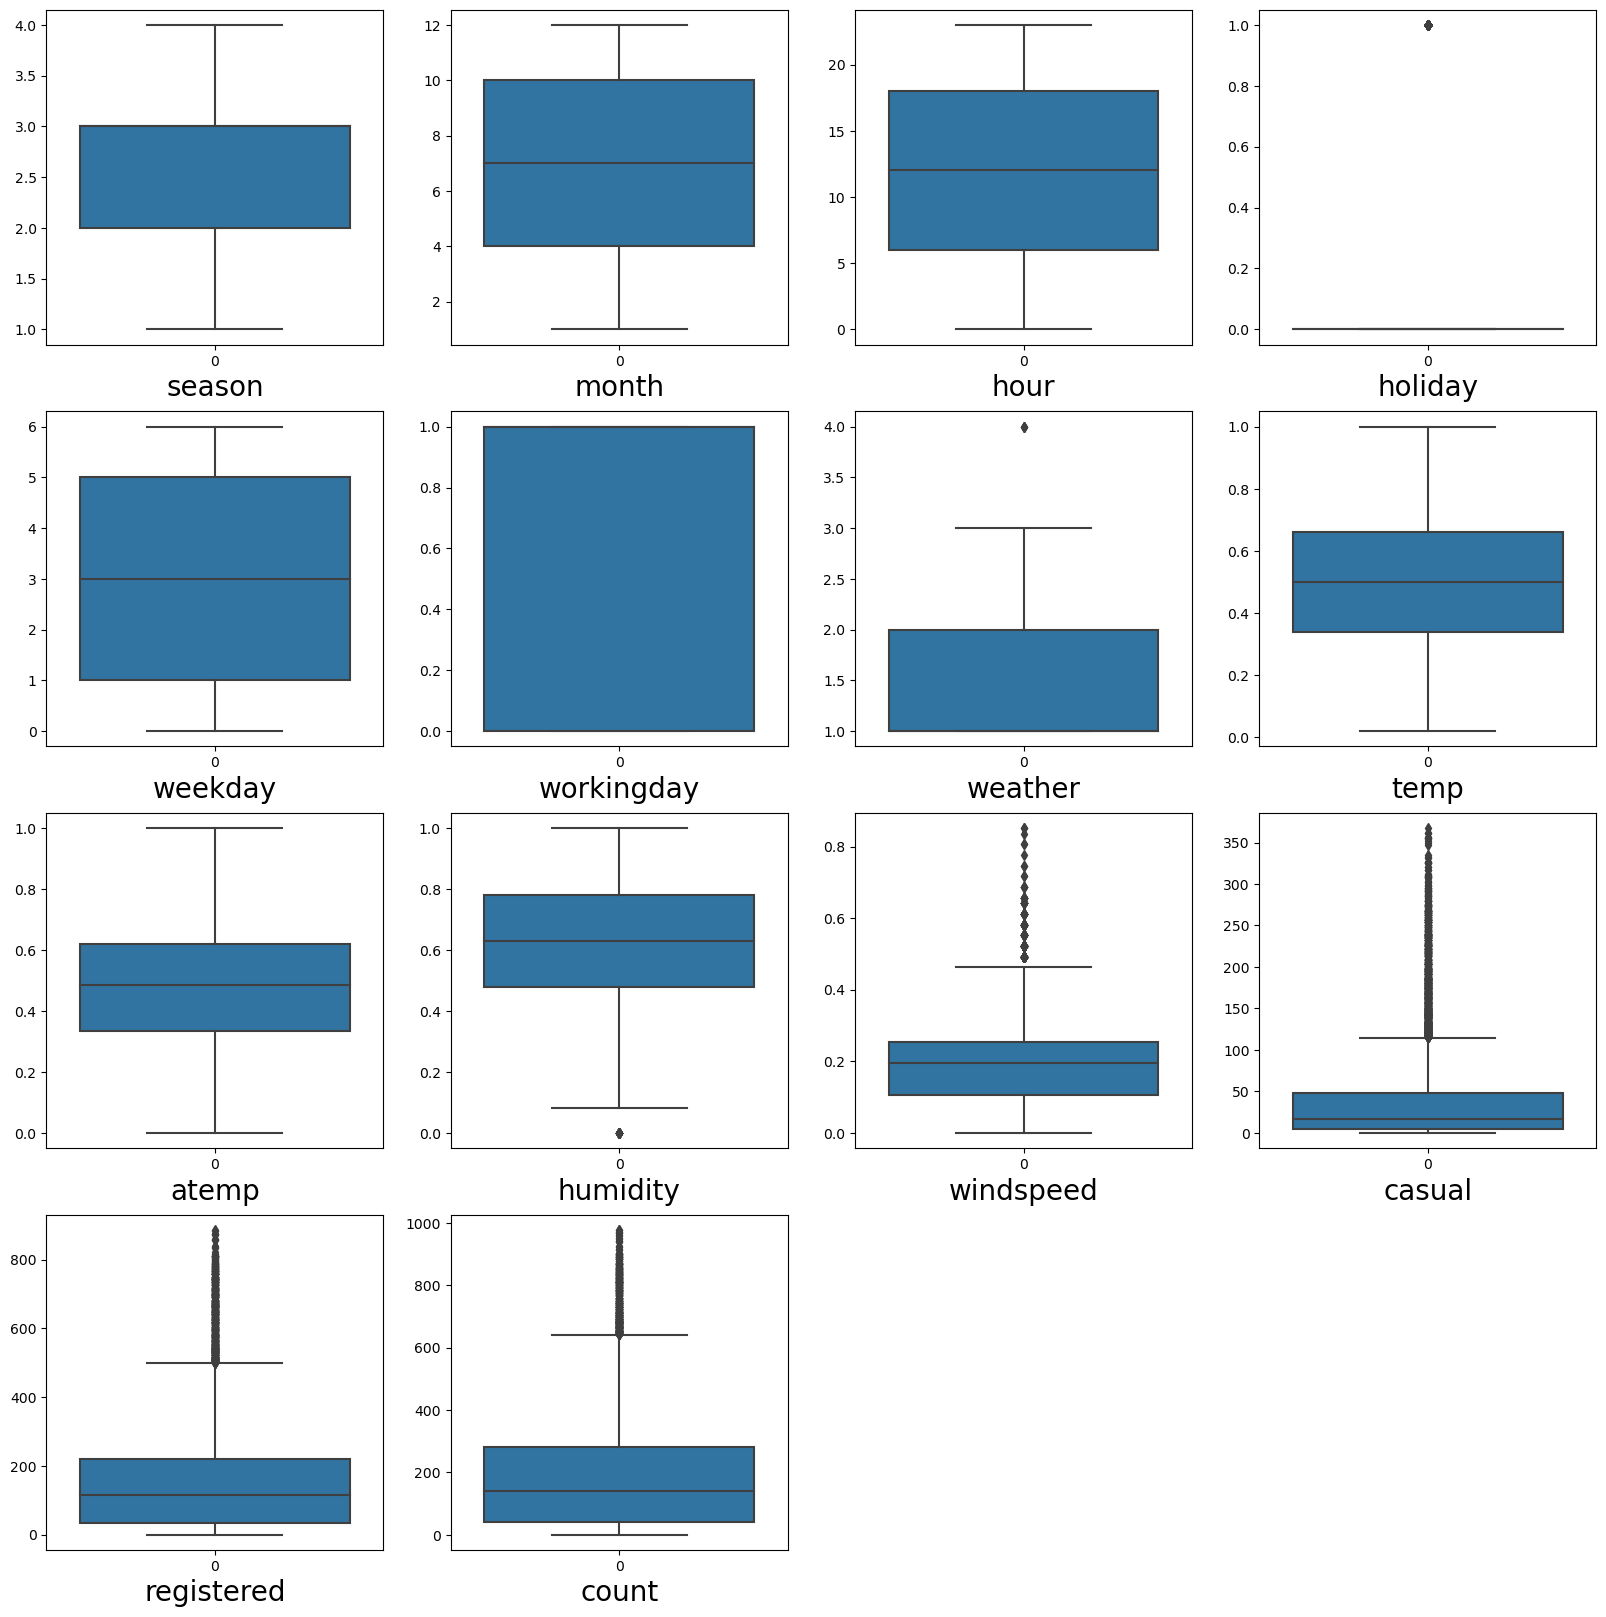

In [31]:
## Lets check outliers in any
plt.figure(figsize=(20,20), facecolor='white')
plotnumber = 1

for column in df:
    if plotnumber<=16 :  
        ax = plt.subplot(4,4,plotnumber)
        sns.boxplot(df[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

## Finding Outliers Using Z-Score :

##### We will be taking the values inside the range of -3 to +3 standard deviation

### ~ Finding out the Limits for humidity :

In [32]:
upper_limit = df['humidity'].mean()+3*df['humidity'].std()
lower_limit = df['humidity'].mean()-3*df['humidity'].std()
print(upper_limit)
print(lower_limit)

1.2060183415926158
0.04843933721514082


In [33]:
df.loc[(df['humidity']>upper_limit) | (df['humidity']<lower_limit)]

,season,month,hour,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
1551,1,3,0,0,4,1,3,0.34,0.3182,0.0,0.2537,3,0,3
1552,1,3,1,0,4,1,3,0.34,0.3182,0.0,0.2537,0,2,2
1553,1,3,2,0,4,1,3,0.34,0.3182,0.0,0.2537,0,1,1
1554,1,3,5,0,4,1,3,0.36,0.3485,0.0,0.1940,1,2,3
1555,1,3,6,0,4,1,3,0.36,0.3333,0.0,0.3284,0,12,12
1556,1,3,7,0,4,1,3,0.38,0.3939,0.0,0.2239,1,36,37
1557,1,3,8,0,4,1,3,0.38,0.3939,0.0,0.2836,1,43,44
1558,1,3,9,0,4,1,3,0.40,0.4091,0.0,0.2239,1,23,24
1559,1,3,10,0,4,1,3,0.40,0.4091,0.0,0.1642,0,17,17
1560,1,3,11,0,4,1,3,0.40,0.4091,0.0,0.2537,6,5,11


### ~ Handling the outliers in humidity :¶

##### Replacing the oulier values to humidity's median :

In [34]:
df.loc[(df['humidity']>upper_limit) | (df['humidity']<lower_limit),'humidity']=df['humidity'].median()

### ~ Finding out the Limits for holiday :

In [35]:
upper_limit = df['holiday'].mean()+3*df['holiday'].std()
lower_limit = df['holiday'].mean()-3*df['holiday'].std()
print(upper_limit)
print(lower_limit)

0.5302661841792383
-0.4727254741268763


In [36]:
df.loc[(df['holiday']>upper_limit) | (df['holiday']<lower_limit)]

,season,month,hour,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
372,1,1,0,1,1,0,2,0.20,0.1970,0.47,0.2239,1,16,17
373,1,1,1,1,1,0,2,0.20,0.1970,0.44,0.1940,1,15,16
374,1,1,2,1,1,0,2,0.18,0.1667,0.43,0.2537,0,8,8
375,1,1,3,1,1,0,2,0.18,0.1818,0.43,0.1940,0,2,2
376,1,1,4,1,1,0,2,0.18,0.1970,0.43,0.1343,1,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17230,1,12,19,1,2,0,2,0.32,0.3030,0.66,0.2239,16,20,36
17231,1,12,20,1,2,0,2,0.32,0.3030,0.66,0.2836,11,29,40
17232,1,12,21,1,2,0,2,0.30,0.2879,0.65,0.1940,8,26,34
17233,1,12,22,1,2,0,2,0.30,0.3030,0.70,0.1642,3,16,19


#### Changing int columns to category :

In [37]:
categorical_hour =  ['season', 'month', 'hour', 'holiday', 'weekday','workingday', 'weather']

In [38]:
for cat in categorical_hour:
    df[cat] = df[cat].astype('category')

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   season      17379 non-null  category
 1   month       17379 non-null  category
 2   hour        17379 non-null  category
 3   holiday     17379 non-null  category
 4   weekday     17379 non-null  category
 5   workingday  17379 non-null  category
 6   weather     17379 non-null  category
 7   temp        17379 non-null  float64 
 8   atemp       17379 non-null  float64 
 9   humidity    17379 non-null  float64 
 10  windspeed   17379 non-null  float64 
 11  casual      17379 non-null  int64   
 12  registered  17379 non-null  int64   
 13  count       17379 non-null  int64   
dtypes: category(7), float64(4), int64(3)
memory usage: 1.0 MB


In [71]:
df.head()

,season,month,hour,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,1,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,1,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,1,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,1,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,1,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


# 4.Train Test Split

In [72]:
X = df.drop(columns=['atemp', 'registered', 'count'], axis=1)
Y = df['count']

In [73]:
X.head(5)

,season,month,hour,holiday,weekday,workingday,weather,temp,humidity,windspeed,casual
0,1,1,0,0,6,0,1,0.24,0.81,0.0,3
1,1,1,1,0,6,0,1,0.22,0.80,0.0,8
2,1,1,2,0,6,0,1,0.22,0.80,0.0,5
3,1,1,3,0,6,0,1,0.24,0.75,0.0,3
4,1,1,4,0,6,0,1,0.24,0.75,0.0,0


In [74]:
Y.head(5)

0    16
1    40
2    32
3    13
4     1
Name: count, dtype: int64

In [75]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [76]:
print(X.shape, X_train.shape, X_test.shape)

(17379, 11) (13903, 11) (3476, 11)


## Feature Normalization

In [79]:
Continuous = ["temp","humidity",'windspeed','casual']

In [80]:
from sklearn.preprocessing import StandardScaler 
std = StandardScaler()

In [81]:
X_train[Continuous] = std.fit_transform(X_train[Continuous])
X_test[Continuous] = std.transform(X_test[Continuous])

In [82]:
X_traindf = pd.DataFrame(X_train, columns=X.columns)

X_traindf.head()

,season,month,hour,holiday,weekday,workingday,weather,temp,humidity,windspeed,casual
335,1,1,11,0,6,0,1,-1.540837,-0.406476,0.278669,-0.362699
7035,4,10,18,0,2,1,1,0.117112,-1.085441,-0.697714,0.584224
8051,4,12,3,0,3,1,3,-0.193753,1.943787,0.278669,-0.725351
2133,2,4,18,0,0,0,2,-0.193753,-1.659949,-1.552252,0.705108
8485,1,12,6,0,0,0,1,-1.540837,0.638085,-0.697714,-0.725351


# 5.Model Fitting

## I. Linear Regression :

In [83]:
from sklearn.linear_model import LinearRegression 
LR=LinearRegression() 

In [90]:
LR.fit(X_train,Y_train)  #object creation

In [101]:
y_predict=LR.predict(X_test) #training of linear regression

In [91]:
Y_train # Actual output values

335       72
7035     518
8051       3
2133     172
8485       1
        ... 
11284    359
11964    812
5390     189
860      100
15795    779
Name: count, Length: 13903, dtype: int64

In [92]:
y_predict # Values predicted by model

array([561.53184746,  81.70741158, 114.14989936, ...,  29.47460496,
       263.22096134, 208.63020276])

In [93]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error 

In [95]:
r2score=r2_score(Y_test,y_predict)
r2score

0.5839540671457482

In [89]:
X_test.shape

(3476, 11)

In [128]:
## calculation of adjusted r2 score
adjusted_r2_LR = 1-(1-0.63)*(3476-11)/(3476-11-1) 
adjusted_r2_LR

0.6298931870669746

In [ ]:
NOTE : The accuracy score achieved using Linear Regression is : 0.62 %

## II. Decision Tree Regressor :

In [97]:
from sklearn.tree import DecisionTreeRegressor 

In [98]:
model = DecisionTreeRegressor(random_state=44)  

In [99]:
model.fit(X_train, Y_train)

DecisionTreeRegressor(random_state=44)

In [100]:
predictions = model.predict(X_test)

In [103]:
r2score=r2_score(Y_test,predictions)
r2score

0.8330702373933008

In [105]:
## calculation of adjusted r2 score
adjusted_r2_DT = 1-(1-0.83)*(3476-11)/(3476-11-1) 
adjusted_r2_DT

0.8299509237875289

In [ ]:
NOTE : The accuracy score achieved using Decision Tree is : 82 %

## III. Random Forest Regressor :

In [106]:
from sklearn.ensemble import RandomForestRegressor 

In [107]:
regressor = RandomForestRegressor(n_estimators = 10, random_state = 0) 

In [109]:
regressor.fit(X_train, Y_train)

RandomForestRegressor(n_estimators=10, random_state=0)

In [110]:
predictions = model.predict(X_test)

In [111]:
y_predict=regressor.predict(X_test)

In [112]:
r2score=r2_score(Y_test,y_predict)
r2score

0.9038258055953134

In [114]:
## calculation of adjusted r2 score
adjusted_r2_RF = 1-(1-0.90)*(3476-11)/(3476-11-1) 
adjusted_r2_RF

0.8999711316397229

In [ ]:
NOTE : The accuracy score achieved using Random Forest is : 89 %

## IV. Gradient Boosting Regressor :

In [115]:
from sklearn.ensemble import GradientBoostingRegressor

In [116]:
gbr=GradientBoostingRegressor(learning_rate=0.01, loss='squared_error', n_estimators=100)
gbr.fit(X_train,Y_train)
Y_predict=gbr.predict(X_test)

In [117]:
Y_predict=gbr.predict(X_test)
Y_predict

array([354.16894603, 121.87582921,  78.76755082, ..., 134.25079689,
       282.58233486, 135.20746357])

In [119]:
rfr_r2score = r2_score(Y_test,Y_predict)
rfr_r2score

0.5803763586500243

In [120]:
adjusted_r2_GB = 1-(1-0.58)*(3476-11)/(3476-11-1) 
adjusted_r2_GB

0.579878752886836

In [ ]:
NOTE : The accuracy score achieved usng GBOOST is : 57 %

# 6. Output Final Score

In [129]:
final_df1 = pd.DataFrame({'MODELS':['LG','DT','RF','GB'],
                        'ACCURACY':[adjusted_r2_LR,adjusted_r2_DT,adjusted_r2_RF,adjusted_r2_GB]})

In [130]:
final_df1

,MODELS,ACCURACY
0,LG,0.629893
1,DT,0.829951
2,RF,0.899971
3,GB,0.579879


<Axes: xlabel='MODELS', ylabel='ACCURACY'>

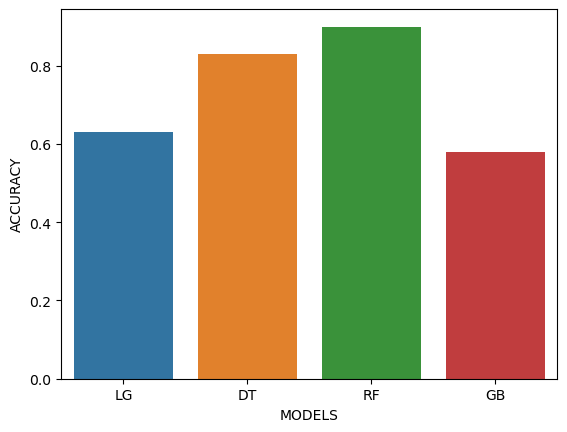

In [131]:
sns.barplot(x=final_df1['MODELS'],y=final_df1['ACCURACY'])

# 7. Model Comparison Report

# Conclusion :
    1. LINEAR REGRESSION
       > r2score = 0.58
       > adjusted_r2 = 0.62

    2. DECISION TREE REGRESSOR
       > r2score = 0.83
       > adjusted_r2 = 0.82

    3. RANDOM FOREST REGRESSOR
       > r2score = 0.90
       > adjusted_r2 = 0.89

    4. Gradient Boosting Regressor
       > r2score = 0.58     
       > adjusted_r2 = 0.57